<a href="https://colab.research.google.com/github/NervOUs11/Predict_S-P500/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [27]:
sp500 = yf.Ticker('^GSPC')

interval = '1d'
start = '1980-01-01'
end = '2000-01-01'

train_data = sp500.history(interval=interval, start=start, end=end)

# Show
train_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-01-02 00:00:00-05:00,0.000000,108.430000,105.290001,105.760002,40610000,0.0,0.0
1980-01-03 00:00:00-05:00,0.000000,106.080002,103.260002,105.220001,50480000,0.0,0.0
1980-01-04 00:00:00-05:00,0.000000,107.080002,105.089996,106.519997,39130000,0.0,0.0
1980-01-07 00:00:00-05:00,0.000000,107.800003,105.800003,106.809998,44500000,0.0,0.0
1980-01-08 00:00:00-05:00,0.000000,109.290001,106.290001,108.949997,53390000,0.0,0.0
...,...,...,...,...,...,...,...
1999-12-27 00:00:00-05:00,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0.0,0.0
1999-12-28 00:00:00-05:00,1457.089966,1462.680054,1452.780029,1457.660034,655400000,0.0,0.0
1999-12-29 00:00:00-05:00,1457.660034,1467.469971,1457.660034,1463.459961,567860000,0.0,0.0


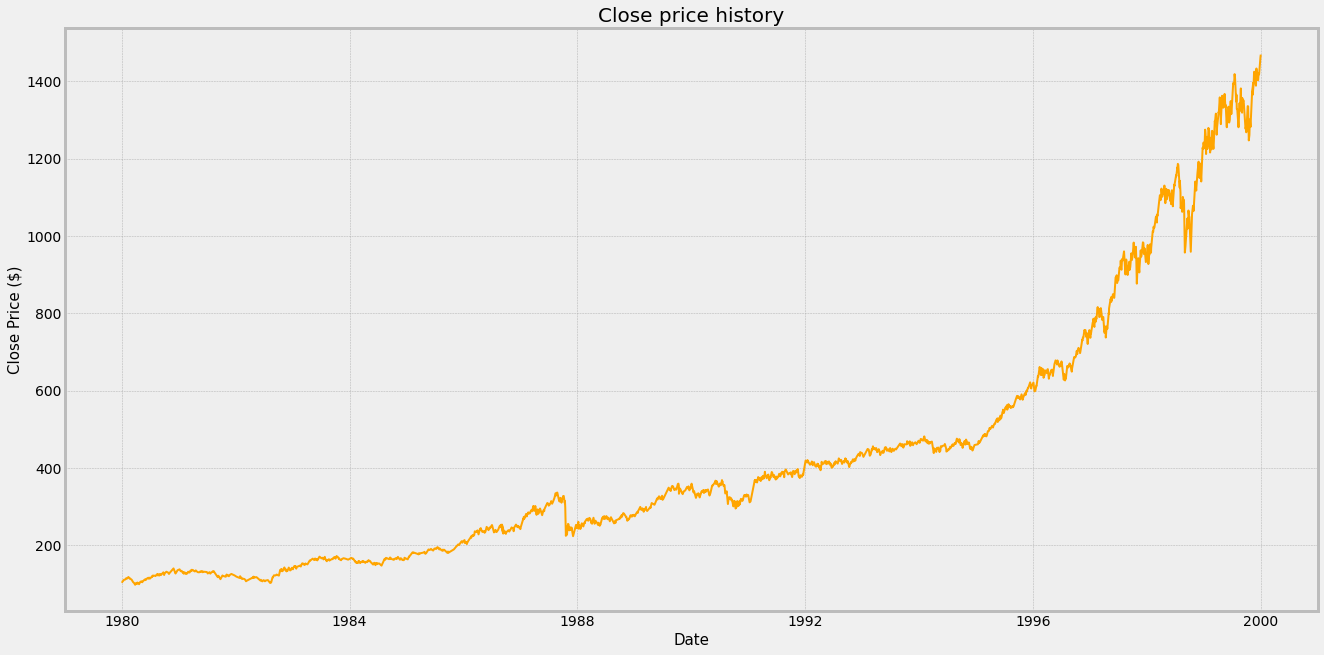

In [32]:
# Visualize the closing price
plt.figure(figsize=(20,10))
plt.style.use('bmh')
plt.title('Close price history',fontsize=20)
plt.plot(train_data['Close'], color='orange')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()